In [1]:
import os
import numpy as np 
import pandas as pd 
from dcapy.models import Period, model_from_dict
import yaml
import matplotlib.pyplot as plt 
import seaborn as sns

scenario_arps.yml
<class 'dcapy.models.schedule.Scenario'>
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:115: RuntimeWarning: divide by zero encountered in log
  return (qi/di)*np.log((di*time_array + 1)/(di*ti+1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:115: RuntimeWarning: invalid value encountered in log
  return (qi/di)*np.log((di*time_array + 1)/(di*ti+1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in power
  g = np.power(b*di*time_array+1,(b-1)/b)


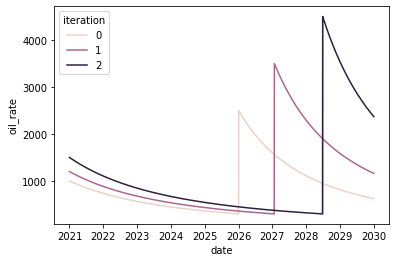

In [2]:
all_files = os.listdir()

#files = [i for i in all_files if i.endswith('yml')]
files = ['scenario_arps.yml']

fig, ax = plt.subplots(len(files),1)

for i, v in enumerate(files):
    print(v)
    with open(v, 'r') as stream:
        try:
            paf = yaml.full_load(stream)
        except yaml.YAMLError as exc:
            print(exc)

    pam = model_from_dict(paf)
    print(type(pam))

    pamf = pam.generate_forecast()

    sns.lineplot(data=pamf, x=pamf.index.to_timestamp(), y='oil_rate', hue='iteration',ax=ax)

In [3]:
pamf

,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,gor,gas_rate,gas_cum,gas_volume,period,scenario
date,,,,,,,,,,,,,,,,,,
2021-01-01,1000.000000,-0.000000e+00,0,1000.000204,4000.0,3000.000000,0.750000,3.000000,3000.000000,1464000.0,NaN,4000.0,0.25,250.000000,250.000000,NaN,pdp,scenario1
2021-01-02,999.096503,9.995481e+02,0,999.096707,4000.0,3000.903497,0.750226,3.003617,6000.903497,1468000.0,3001.354633,4000.0,0.25,249.774126,499.774126,249.661342,pdp,scenario1
2021-01-03,998.194230,1.998193e+03,0,998.194434,4000.0,3001.805770,0.750451,3.007236,9002.709267,1472000.0,3002.256296,4000.0,0.25,249.548558,749.322683,249.435926,pdp,scenario1
2021-01-04,997.293179,2.995937e+03,0,997.293382,4000.0,3002.706821,0.750677,3.010857,12005.416088,1476000.0,3003.156737,4000.0,0.25,249.323295,998.645978,249.210816,pdp,scenario1
2021-01-05,996.393347,3.992780e+03,0,996.393550,4000.0,3003.606653,0.750902,3.014479,15009.022741,1480000.0,3004.055960,4000.0,0.25,249.098337,1247.744315,248.986010,pdp,scenario1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-12-28,2376.612362,1.795386e+06,2,2376.612951,4000.0,1623.387638,0.405847,0.683068,401175.613222,14596000.0,1624.569738,4000.0,0.25,594.153091,449706.096694,593.857566,pud,scenario1
2029-12-29,2374.248162,1.797761e+06,2,2374.248750,4000.0,1625.751838,0.406438,0.684744,402801.365060,14600000.0,1626.932175,4000.0,0.25,593.562041,450299.658735,593.266956,pud,scenario1
2029-12-30,2371.887488,1.800134e+06,2,2371.888075,4000.0,1628.112512,0.407028,0.686421,404429.477572,14604000.0,1629.291090,4000.0,0.25,592.971872,450892.630607,592.677228,pud,scenario1


In [6]:
pam.periods.keys()

dict_keys(['pdp', 'pud'])